In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_origin = pd.read_csv('vgames2.csv', index_col=[0])
df_origin.info()
print('\n',df_origin.shape)
df_origin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB

 (16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
#중복된 데이터 개수 확인
print(df_origin.duplicated().sum())

#중복된 데이터 확인
print(df_origin[df_origin.duplicated()])

#중복 데이터 제거
df_dropDuplicated = df_origin.drop_duplicates().reset_index(drop=True)
df_dropDuplicated

1
                             Name Platform  Year    Genre Publisher NA_Sales  \
9185  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   

     EU_Sales JP_Sales Other_Sales  
9185        0     0.02           0  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
#결측치 확인
print(df_dropDuplicated.isna().sum())
df_dropDuplicated[df_dropDuplicated.isna().any(axis=1)]

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16424,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16430,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16431,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16554,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


Year에서 270, Genre에서 50, Publisher에서 58 도합 중복 결측 고려하여 356개의 행에 결측치가 있음을 확인 가능함. 이 값을 전부 drop해버려도 356 / 16597 ≒ **2.14%** 정도의 비중이므로 큰 문제가 없을 것이라 간주되지만 Sales 즉, 출고량 데이터에서 0이 결측 데이터가 아니라는 전제하에 활용이 가능할 것이라 생각되므로 결측데이터 행을 남겨두고 필요한 경우만 제하기로 한다.

Year가 float인 것은 다소 이상합니다. int 형태로 변경해줍니다.

<AxesSubplot: title={'center': 'titles per year'}, xlabel='Year'>

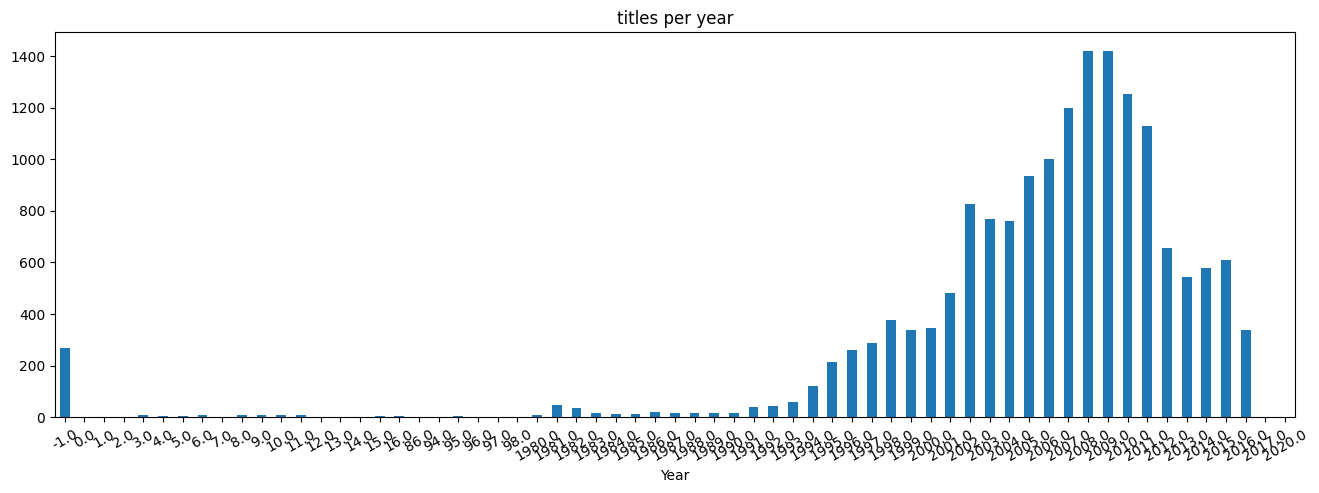

In [4]:
# 일단 Year의 결측치를 전부 -1.0으로 바꿉니다.
df_changedYear = df_dropDuplicated.copy()
df_changedYear['Year'] = df_changedYear['Year'].fillna(-1)
df_changedYear.groupby('Year')['Name'].count().plot(kind='bar',
                                              title='titles per year', rot=30, figsize=(16,5))


변환하고 보니 -1 이외, 1980년 이전에, 그것도 무려 1세기에 게임이 출고되었다는 식의 데이터가 있습니다. 타이틀네임을 구글링 결과 전수 조사 결과는 아니나, 00~ 16년 까지는 앞에 20이 빠진듯 보이고, 86부터 98까지는 앞에 19가 빠진듯 보입니다. 해당 부분을 수정해주도록 하고, -1 또한 연도를 비교하는 데이터 이외에는 쓸 수 있을 것 같으니 그대로 int로 변경합니다.

<AxesSubplot: title={'center': 'titles per year'}, xlabel='Year'>

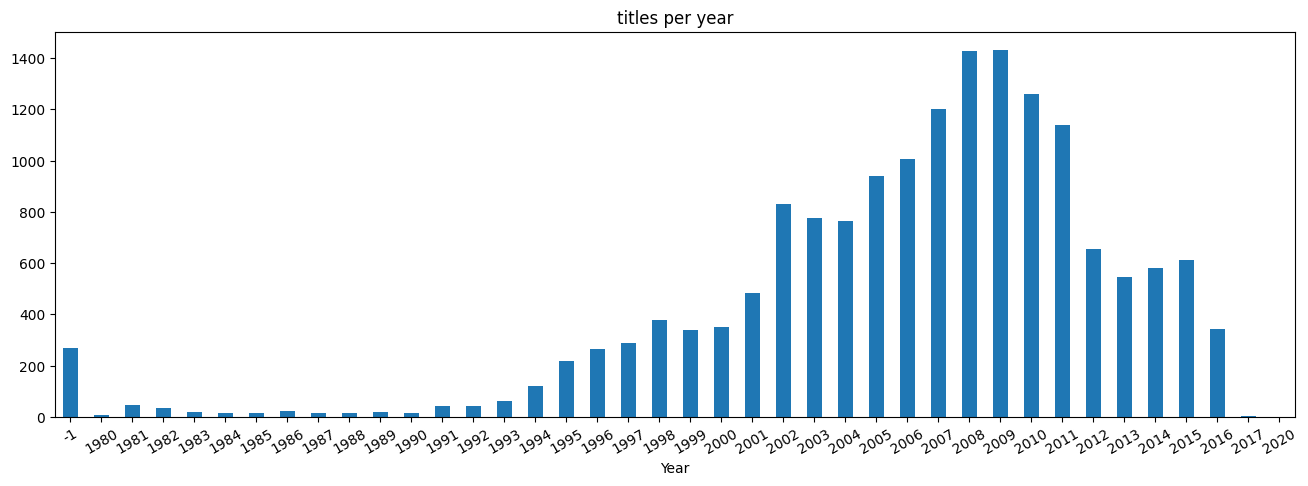

In [5]:
df_changedYearInt = df_changedYear.copy()
#float 데이터를 int로 변환하면서 접미수인 .0은 사라짐
df_changedYearInt['Year'] = df_changedYearInt['Year'].astype('int')
df_changedYearPrefix = df_changedYearInt.copy()
def getRightYear(year):
  if year >= 1980: return year
  elif year >= 86: return year + 1900
  elif year >= 0 : return year + 2000
  else: return -1

df_changedYearPrefix['Year'] = df_changedYearPrefix['Year'].apply(getRightYear)
df_changedYearPrefix.groupby('Year')['Name'].count().plot(kind='bar',
                                              title='titles per year', rot=30, figsize=(16,5))

또한 각 출고량(*_Sales)의 값이 Object로 되어있는데 계산을 편하게 하기 위해 float로 변경합니다.

In [6]:
import re
df_changedAllSales = df_changedYearPrefix.copy()
# 출고량의 접미문자에 맞춰 float로 변경해줌
def convert_to_M(quantity):
  '''
  quantity는 간혹 M 혹은 K일 수 있음. 기본적으로 소수만 있는 경우 M으로 간주하여 K인 경우 1/1000로 줄임
  e.g. 300k, 1.1M, 4.5
  '''
  # split the string into value and unit ['300', 'k']
  if quantity.replace('.','',1).isdigit() == True:
    value = quantity
    unit = 'M'
  else:
    split_q = re.match('([\d\.]+)?([a-zA-Z]+)', quantity)
    value = split_q.group(1) # 300
    unit = split_q.group(2)  # K, M
    
  if unit == 'm' or unit == 'M':
    return float(value)
  if unit == 'k' or unit == 'K':
    return round(float(value)/1000, 2)

def convert_series(series):
  return series.apply(lambda x : convert_to_M(x))

df_filteredSales = df_changedAllSales[df_changedAllSales.iloc[:, 5:].apply(lambda xf : xf.apply(lambda x: not x.replace('.','',1).isdigit())).any(axis=1)]
df_filteredSales

# 각 Sales에 접미문자가 저장되어있는 행을 조사
print(df_changedAllSales.iloc[df_filteredSales.index])
df_changedAllSales.iloc[:, 5:] = df_changedAllSales.iloc[:, 5:].apply(lambda x: convert_series(x))

# 접미문자가 저장되어있는 행이 변경된 것을 확인
print(df_changedAllSales.iloc[df_filteredSales.index])
# Sales 컬럼이 전부 float인지 확인
print(df_changedAllSales.info())


                                        Name Platform  Year      Genre  \
10                               Ford Racing       PS  2001     Racing   
36                 Advance Wars: Dual Strike       DS  2005   Strategy   
45              Resident Evil: Revelations 2      PS3  2015     Action   
64                           SD Gundam Force      GBA  2004    Shooter   
73              Teenage Mutant Ninja Turtles       XB  2003     Action   
...                                      ...      ...   ...        ...   
16524                        Planet Monsters      GBA  2001     Action   
16570                           Koihime Enbu      PS4  2016   Fighting   
16577                   Gex: Enter the Gecko       PS  1998   Platform   
16579  Captain Morgane and the Golden Turtle       DS  2012  Adventure   
16590                        Madden NFL 2005      PS2  2004     Sports   

                           Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10                Empire Interact

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_43876\1407019888.py:31: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_changedAllSales.iloc[:, 5:] = df_changedAllSales.iloc[:, 5:].apply(lambda x: convert_series(x))


#### 1. 지역에 따라서 선호하는 게임 장르가 다를까

In [7]:
# Genre 결측치 행을 제거
df_cleanedGenre = df_changedAllSales[df_changedAllSales['Genre'].notna()].reset_index(drop=True)
df_cleanedGenre

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16542,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16543,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16544,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16545,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
# Genre 그룹별로 묶어서 보여줌
df_GenreSalesMeans = df_cleanedGenre.drop(columns='Year').groupby('Genre').mean(numeric_only=True)
df_GenreSalesMeans

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264693,0.157991,0.047776,0.056415
Adventure,0.082547,0.050039,0.040586,0.013133
Fighting,0.263518,0.119504,0.103117,0.043259
Misc,0.235323,0.122468,0.060709,0.042699
Platform,0.505023,0.228066,0.147794,0.058292
Puzzle,0.213408,0.087768,0.098391,0.021661
Racing,0.287361,0.190748,0.045374,0.062027
Role-Playing,0.215469,0.123790,0.232603,0.038409
Shooter,0.445233,0.239518,0.029273,0.078539


Genre X 지역별 평균 출고량은 구할 수 있었지만, 이 표만으로는 각 지역별 선호 게임 장르를 직관적으로 알기 어렵습니다. 각 지역에서 게임을 구매했을시, 장르별로 해당 장르를 골랐을 조건부 확률을 구해봅니다.

In [9]:
df_GenreSalesMeans['NA_Sales'].sum()
df_condProbability = df_GenreSalesMeans.apply(lambda x : x/x.sum())
print(df_condProbability)
print(df_condProbability.sum())
print(df_condProbability.std())

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        0.084951  0.094132  0.047311     0.107444
Adventure     0.026493  0.029814  0.040191     0.025012
Fighting      0.084574  0.071201  0.102114     0.082388
Misc          0.075525  0.072967  0.060119     0.081322
Platform      0.162084  0.135883  0.146356     0.111020
Puzzle        0.068492  0.052293  0.097434     0.041254
Racing        0.092227  0.113649  0.044933     0.118134
Role-Playing  0.069153  0.073755  0.230339     0.073151
Shooter       0.142895  0.142706  0.028988     0.149581
Simulation    0.067884  0.078075  0.072925     0.069312
Sports        0.093297  0.095818  0.057263     0.109563
Strategy      0.032425  0.039709  0.072028     0.031817
NA_Sales       1.0
EU_Sales       1.0
JP_Sales       1.0
Other_Sales    1.0
dtype: float64
NA_Sales       0.038701
EU_Sales       0.035140
JP_Sales       0.056549
Other_Sales    0.037860
dtype: float64


이 csv 데이터는 표본이 아닌 모집단 자료로 간주합니다. 임의의 Sales Series X, Y의 장르별 확률 x<sub>i</sub>와 y<sub>i</sub>가 있다고 가정할 때,

$1\geq x_i \geq0, 1\geq y_i \geq 0 \\
\sqrt{\frac{\sum_{i=1}^{12}{x_i^2} + \sum_{i=1}^{12}{y_i^2}}{12}} \geq \sqrt{\frac{\sum_{i=1}^{12}{(x_i-y_i)^2}}{12}} \geq 0 \\ $
이므로,

$1 - {{σ_{X-Y}}\over {\sqrt{σ_X^2 + σ_Y^2}}} < 0.05$

인 경우, 각 지역별 선호 장르 간의 차이가 없다는 귀무 가설을 기각할 수 있다고 가정하겠습니다. 각 지역간 비교는 <sub>4</sub>C<sub>2</sub> = 6 이므로 6가지 경우의 수가 있습니다.

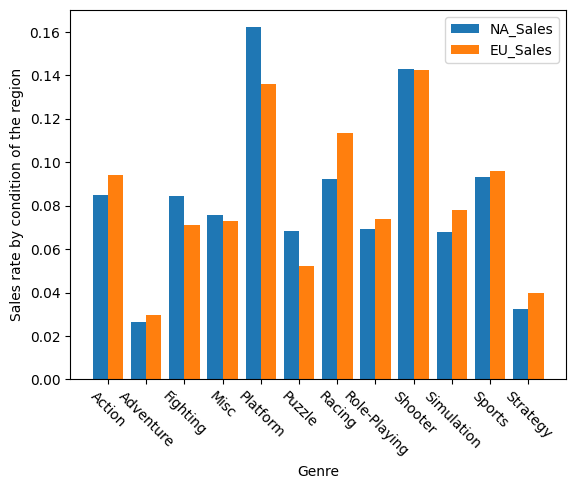

0.7610052329212765


False

In [10]:
# 1. NA, EU
X_axis = np.arange(len(df_condProbability))

comp1 = df_condProbability.columns[0]
comp2 = df_condProbability.columns[1]

# 그래프 생성
plt.bar(X_axis - 0.2, df_condProbability[comp1], 0.4, label = comp1)
plt.bar(X_axis + 0.2, df_condProbability[comp2], 0.4, label = comp2)

plt.xticks(X_axis, df_condProbability.index, rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Sales rate by condition of the region')
plt.legend()
plt.show()

# p-value공식의 분자와 분모를 구함
std_diff = np.std(df_condProbability[comp1] - df_condProbability[comp2])
sqrt_sumvar = np.sqrt(df_condProbability[comp1].var() + df_condProbability[comp2].var())

# p-value를 구하여 0.05와 비교
print(1 - std_diff/ sqrt_sumvar)
(1 - std_diff/ sqrt_sumvar < 0.05)

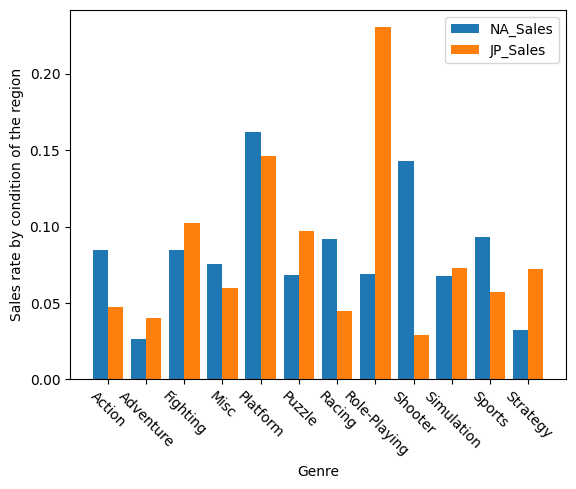

0.08360138617882062


False

In [11]:
# 2. NA, JP
X_axis = np.arange(len(df_condProbability))

comp1 = df_condProbability.columns[0]
comp2 = df_condProbability.columns[2]

# 그래프 생성
plt.bar(X_axis - 0.2, df_condProbability[comp1], 0.4, label = comp1)
plt.bar(X_axis + 0.2, df_condProbability[comp2], 0.4, label = comp2)

plt.xticks(X_axis, df_condProbability.index, rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Sales rate by condition of the region')
plt.legend()
plt.show()

# p-value공식의 분자와 분모를 구함
std_diff = np.std(df_condProbability[comp1] - df_condProbability[comp2])
sqrt_sumvar = np.sqrt(df_condProbability[comp1].var() + df_condProbability[comp2].var())

# p-value를 구하여 0.05와 비교
print(1 - std_diff/ sqrt_sumvar)
(1 - std_diff/ sqrt_sumvar < 0.05)

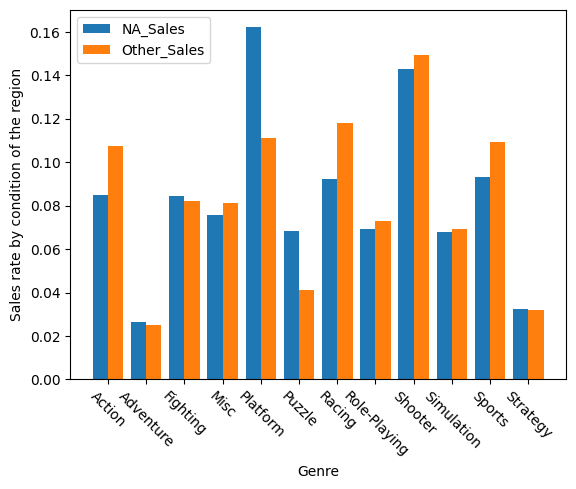

0.6269548701826192


False

In [12]:
# 3. NA, Other
X_axis = np.arange(len(df_condProbability))

comp1 = df_condProbability.columns[0]
comp2 = df_condProbability.columns[3]

# 그래프 생성
plt.bar(X_axis - 0.2, df_condProbability[comp1], 0.4, label = comp1)
plt.bar(X_axis + 0.2, df_condProbability[comp2], 0.4, label = comp2)

plt.xticks(X_axis, df_condProbability.index, rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Sales rate by condition of the region')
plt.legend()
plt.show()

# p-value공식의 분자와 분모를 구함
std_diff = np.std(df_condProbability[comp1] - df_condProbability[comp2])
sqrt_sumvar = np.sqrt(df_condProbability[comp1].var() + df_condProbability[comp2].var())

# p-value를 구하여 0.05와 비교
print(1 - std_diff/ sqrt_sumvar)
(1 - std_diff/ sqrt_sumvar < 0.05)

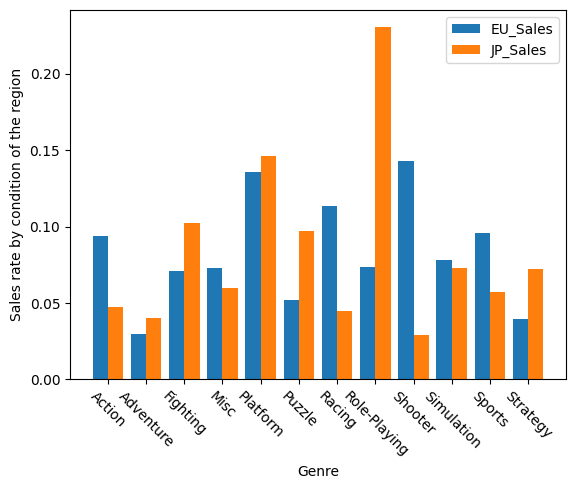

0.027580201411494643


True

In [13]:
# 4. EU, JP
X_axis = np.arange(len(df_condProbability))

comp1 = df_condProbability.columns[1]
comp2 = df_condProbability.columns[2]

# 그래프 생성
plt.bar(X_axis - 0.2, df_condProbability[comp1], 0.4, label = comp1)
plt.bar(X_axis + 0.2, df_condProbability[comp2], 0.4, label = comp2)

plt.xticks(X_axis, df_condProbability.index, rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Sales rate by condition of the region')
plt.legend()
plt.show()

# p-value공식의 분자와 분모를 구함
std_diff = np.std(df_condProbability[comp1] - df_condProbability[comp2])
sqrt_sumvar = np.sqrt(df_condProbability[comp1].var() + df_condProbability[comp2].var())

# p-value를 구하여 0.05와 비교
print(1 - std_diff/ sqrt_sumvar)
(1 - std_diff/ sqrt_sumvar < 0.05)

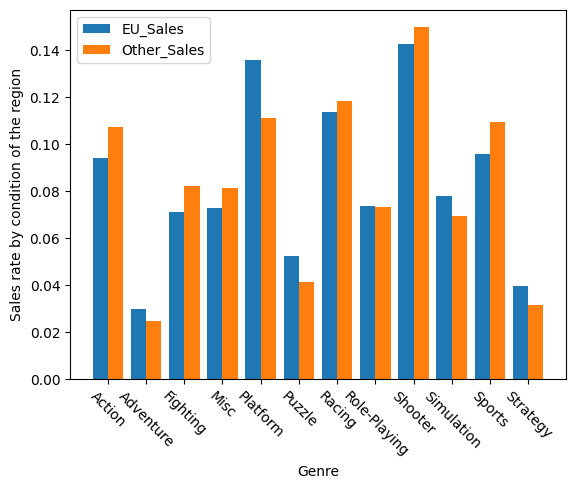

0.7813321755445528


False

In [14]:
# 5. EU, Other
X_axis = np.arange(len(df_condProbability))

comp1 = df_condProbability.columns[1]
comp2 = df_condProbability.columns[3]

# 그래프 생성
plt.bar(X_axis - 0.2, df_condProbability[comp1], 0.4, label = comp1)
plt.bar(X_axis + 0.2, df_condProbability[comp2], 0.4, label = comp2)

plt.xticks(X_axis, df_condProbability.index, rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Sales rate by condition of the region')
plt.legend()
plt.show()

# p-value공식의 분자와 분모를 구함
std_diff = np.std(df_condProbability[comp1] - df_condProbability[comp2])
sqrt_sumvar = np.sqrt(df_condProbability[comp1].var() + df_condProbability[comp2].var())

# p-value를 구하여 0.05와 비교
print(1 - std_diff/ sqrt_sumvar)
(1 - std_diff/sqrt_sumvar < 0.05)

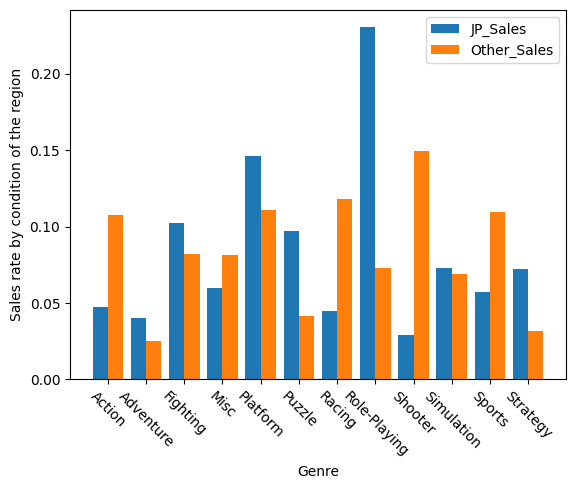

-0.022161476158195414


True

In [15]:
# 6. JP, Other
X_axis = np.arange(len(df_condProbability))

comp1 = df_condProbability.columns[2]
comp2 = df_condProbability.columns[3]

# 그래프 생성
plt.bar(X_axis - 0.2, df_condProbability[comp1], 0.4, label = comp1)
plt.bar(X_axis + 0.2, df_condProbability[comp2], 0.4, label = comp2)

plt.xticks(X_axis, df_condProbability.index, rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Sales rate by condition of the region')
plt.legend()
plt.show()

# p-value공식의 분자와 분모를 구함
std_diff = np.std(df_condProbability[comp1] - df_condProbability[comp2])
sqrt_sumvar = np.sqrt(df_condProbability[comp1].var() + df_condProbability[comp2].var())

# p-value를 구하여 0.05와 비교
print(1- std_diff/ sqrt_sumvar)
((1 - std_diff/ sqrt_sumvar) < 0.05)

### 1번 답

- **4. EU/JP**, **6. JP/Other** 의 경우 귀무가설이 기각되어 일본지역의 경우 유럽, 기타 지역과 선호하는 게임 장르가 유의미하게 다르다고 할 수 있을 것입니다.

---

#### 2. 연도별 게임의 트렌드가 있을까?

In [16]:
df_changedYearPrefix[df_changedYearPrefix['Year']<0]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,-1,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,-1,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,-1,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,-1,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,-1,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16239,Freaky Flyers,GC,-1,Racing,Unknown,0.01,0,0,0
16274,Space Invaders,2600,-1,Shooter,Atari,2.36,0.14,0M,0.03
16277,Madden NFL 11,Wii,-1,Sports,Unknown,0.7,0,0,50K
16424,Yoostar on MTV,X360,-1,Misc,Unknown,0.06,0,0,0


- 결측치의 Year는 당초 변환한대로 -1로 되어있습니다. 아마 구글링을 하면 구할 수도 있겠지만, 16597중 270, 즉 1.62% 정도의 샘플이 누락된 98.38%의 표본으로 구한다고 한들 트렌드를 구하는데는 지장이 없을 것으로 생각됩니다. 드랍 이후, 연도별 게임의 트렌드를 구해봅니다.

In [17]:
df_droppedByYear = df_changedYearPrefix.drop(df_changedYearPrefix[df_changedYearPrefix['Year']<0].index).reset_index(drop=True)
df_droppedByYear

#seaborn 그래프 사이즈 변경
sns.set(rc={'figure.figsize' : (10.7, 8.27)})


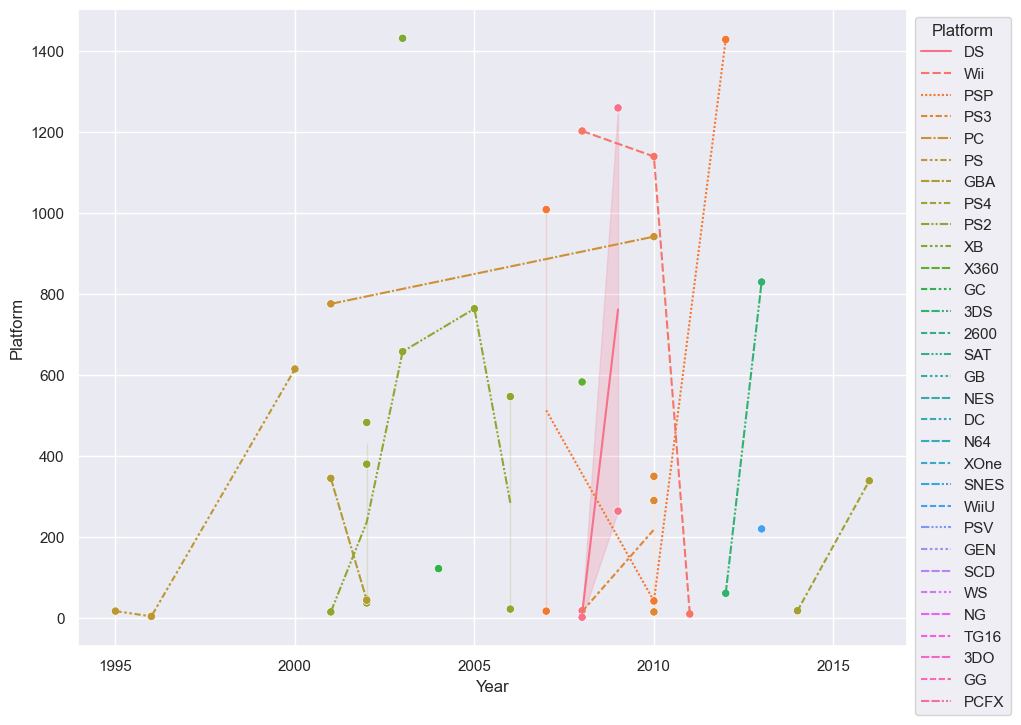

In [18]:
# Platform 별 트렌드
trend = 'Platform'
ax = sns.lineplot(df_droppedByYear, x='Year', y=df_droppedByYear.groupby('Year')[trend].count(), style=trend, hue=trend)
asx = sns.scatterplot(df_droppedByYear, x='Year', y=df_droppedByYear.groupby('Year')[trend].count(), hue=trend, legend=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### 답 2-1

1. PS

  - 1995년도부터 2000년까지 PS 게임이 시장을 장악한 것을 볼 수 있고, PS2게임이 2000년대 초부터 2005년까지 상당한 퍼블리싱량을 보이다 이후 꺾이고 PS3 게임은 이전과 같은 아성을 보여주지 못하나 PS4에서 회복하는 것을 볼 수 있습니다.

2. PC

  - PC게임 시장은 2000년대 초부터 꾸준히 증가함을 볼 수 있습니다. 하지만 2010년 이후 사라지므로 타 플랫폼에 잠식된 것을 알 수 있습니다.

3. 포터블

  - PSP게임이 2010년대 초반에 반짝이지만 굉장한 퍼블리싱량을 보이는 것을 볼 수 있습니다. 마찬가지로 닌텐도 3DS(포터블 게임기) 게임이 2010년 초반에 약진을 보이므로 대세가 포터블 게임으로 넘어갔던 것을 알 수 있습니다. 하지만 이 또한 2010년 중반을 넘기지 못하고 사라지므로 타 플랫폼에 잠식되었다고 생각할 수 있습니다.

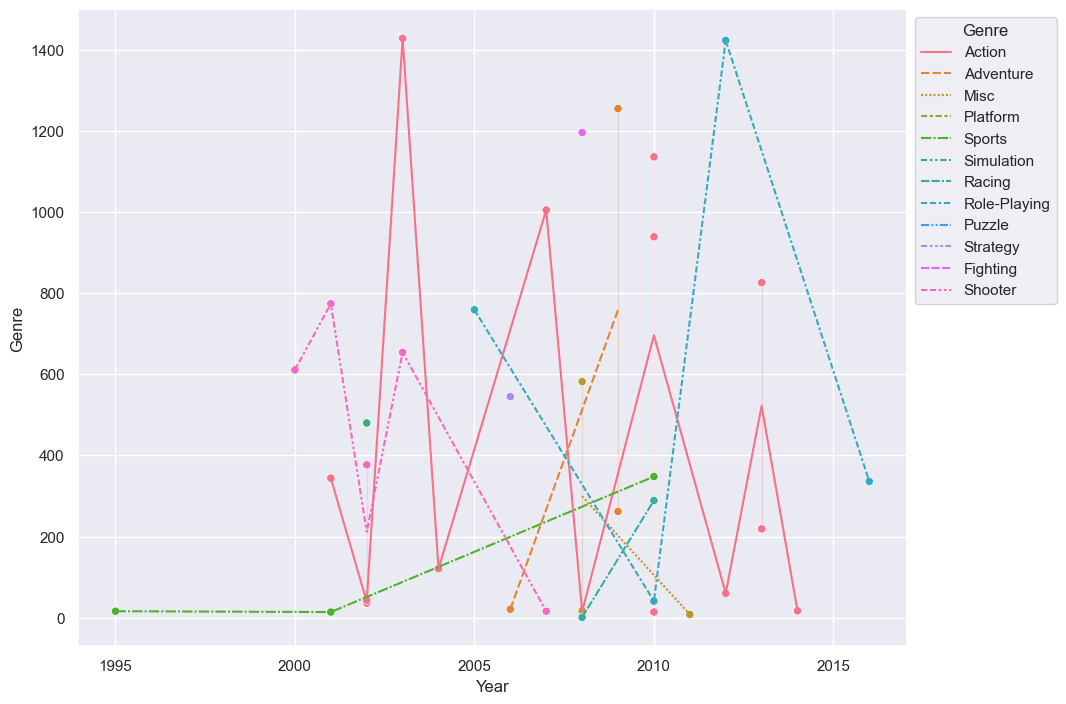

In [19]:
# Genre 별 트렌드
trend = 'Genre'
ax = sns.lineplot(df_droppedByYear, x='Year', y=df_droppedByYear.groupby('Year')[trend].count(), style=trend, hue=trend)
asx = sns.scatterplot(df_droppedByYear, x='Year', y=df_droppedByYear.groupby('Year')[trend].count(), hue=trend, legend=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### 답 2-2
1. 스포츠
- 스포츠게임이 1995년부터 꾸준히 나오다가 2000년대초 증가세를 보이고 2010년 이후로 타 게임에 잠식당한 것을 볼 수 있음
2. 슈터
- 슈터게임이 2000년에 인기를 끌다가 점차 사그라들며 2000년대 말쯤엔 완전히 사그라든 것을 알 수 있다.
3. 액션
- 액션게임이 2000년대 초에 나타나기 시작해 굉장한 인기를 끌었다가 중반까지 잠잠해지는데, 다시 중반넘어 이전과 버금가는 인기를 끌었고 점차 퍼블리싱 인기가 사그라드는 추세이다.
4. 롤플레잉
- 롤플레잉 게임이 2005년대 초에 상당한 인기와 함께 나타났다가 2010년까지 급격히 잠잠해지나 그 이후 퍼블리싱 인기가 정점을 찍고 2015년쯤에 사그러들지만 그래도 가장 많은 시장을 점유하고 있다. 

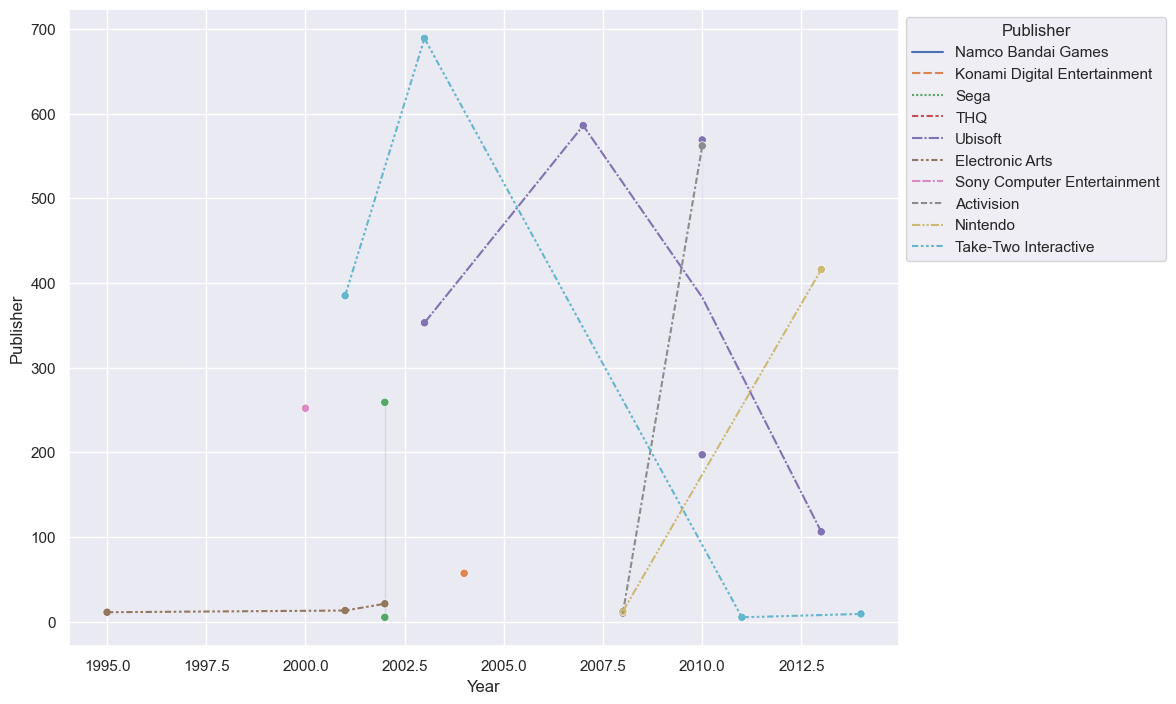

In [20]:
# Publisher 별 트렌드는 너무 Publisher가 많으므로 Top 10만 뽑았다.

top10Pub = df_droppedByYear['Publisher'].value_counts().head(10)
# top10Pub
df_top10Pub = df_droppedByYear[df_droppedByYear['Publisher'].isin(top10Pub.index)]

trend = 'Publisher'
ax = sns.lineplot(df_top10Pub, x='Year', y=df_top10Pub.groupby('Year')[trend].count(), style=trend, hue=trend)
asx = sns.scatterplot(df_top10Pub, x='Year', y=df_top10Pub.groupby('Year')[trend].count(), hue=trend, legend=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### 답 2-3

1. Electronic Arts
- EA는 1995년부터 꾸준히 게임을 만들었지만 2000년대 초반부터 소식이 없다

2. Sega
- Sega는 2000년대 초반부터 중반까지 엄청난 퍼블리싱량을 보였지만 2010년초 까지 줄어들어 그 이후 명색만 유지하고 있다.

3. Ubisoft
- Ubisoft는 2000년대 초반에 급부상해 2010년까지 상당한 퍼블리싱량을 보였지만 점차 감소중이다.

4. Activision
- Activision은 2000년대 후반에 상당한 퍼블리싱량을 보였지만 2010년 이후로 소식이 들리지 않는다.

5. Nintendo
- 닌텐도는 2000년대 후반부터 퍼블리싱량이 증가하기 시작하여 2012년 최근 가장 많은 퍼블리싱량을 내고 있다.


---

#### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [52]:
# 	NA_Sales	EU_Sales	JP_Sales	Other_Sales
# NA_Sales가 가장 높은 것부터 차례대로 100개
pickSales = 'NA_Sales'
df_highestNA = df_changedAllSales.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', pickSales]].iloc[df_changedAllSales.loc[:, pickSales].nlargest(100).index]
df_highestNA.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08
10487,Duck Hunt,NES,1984,Shooter,Nintendo,26.93
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20
12578,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97
16530,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03
13110,Super Mario World,SNES,1990,Platform,Nintendo,12.78


In [53]:
# 	NA_Sales	EU_Sales	JP_Sales	Other_Sales
# EU_Sales 가장 높은 것부터 차례대로 100개
pickSales = 'EU_Sales'
df_highestEU = df_changedAllSales.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', pickSales]].iloc[df_changedAllSales.loc[:, pickSales].nlargest(100).index]
df_highestEU.head(20)

,Name,Platform,Year,Genre,Publisher,EU_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,29.02
12578,Mario Kart Wii,Wii,2008,Racing,Nintendo,12.88
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,11.01
11136,Nintendogs,DS,2005,Simulation,Nintendo,11.00
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,9.27
13228,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,9.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,9.23
3014,Wii Play,Wii,2006,Misc,Nintendo,9.20
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,8.89
10898,Wii Fit Plus,Wii,2009,Sports,Nintendo,8.59


In [54]:
# 	NA_Sales	EU_Sales	JP_Sales	Other_Sales
# JP_Sales 가장 높은 것부터 차례대로 100개
pickSales = 'JP_Sales'
df_highestJP = df_changedAllSales.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', pickSales]].iloc[df_changedAllSales.loc[:, pickSales].nlargest(100).index]
df_highestJP.head(20)

,Name,Platform,Year,Genre,Publisher,JP_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,10.22
9415,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,7.20
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,6.81
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
10554,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04
10620,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
10916,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,5.32
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,4.87


In [55]:
# 	NA_Sales	EU_Sales	JP_Sales	Other_Sales
# Other_Sales 가장 높은 것부터 차례대로 100개
pickSales = 'Other_Sales'
df_highestOther = df_changedAllSales.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', pickSales]].iloc[df_changedAllSales.loc[:, pickSales].nlargest(100).index]
df_highestOther.head(20)

,Name,Platform,Year,Genre,Publisher,Other_Sales
14668,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,10.57
2908,Wii Sports,Wii,2006,Sports,Nintendo,8.46
14664,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,7.53
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,4.14
12578,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.31
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.96
8213,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,2.93
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,2.90
3014,Wii Play,Wii,2006,Misc,Nintendo,2.85
11136,Nintendogs,DS,2005,Simulation,Nintendo,2.75


In [56]:
# NA_Sales, EU_Sales, JP_Sales, Other_Sales 전부 합산한 Global_Sales 항목 생성해서 따로 데이터프레임을 생성함
df_Global = df_changedAllSales.iloc[:, 0:5].assign(Global_Sales=df_changedAllSales.iloc[:, 6:].sum(axis=1))
# 1위부터 100위까지 추출
df_highestGlobal = df_Global.iloc[df_Global['Global_Sales'].nlargest(100).index]

# 일단 상위 20개만 보여줌
df_highestGlobal.head(20)

,Name,Platform,Year,Genre,Publisher,Global_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.25
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,20.11
12578,Mario Kart Wii,Wii,2008,Racing,Nintendo,19.98
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,18.63
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,17.25
11136,Nintendogs,DS,2005,Simulation,Nintendo,15.68
13228,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,15.47
3014,Wii Play,Wii,2006,Misc,Nintendo,14.98
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,14.38
9415,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,14.09


각 지역에 관한 제반 조사를 했지만, 글로벌 출고를 예정하고 있다는 가정하에 글로벌 수치 위주로 조사를 하도록 하겠습니다.

<AxesSubplot: xlabel='Platform', ylabel='Global_Sales'>

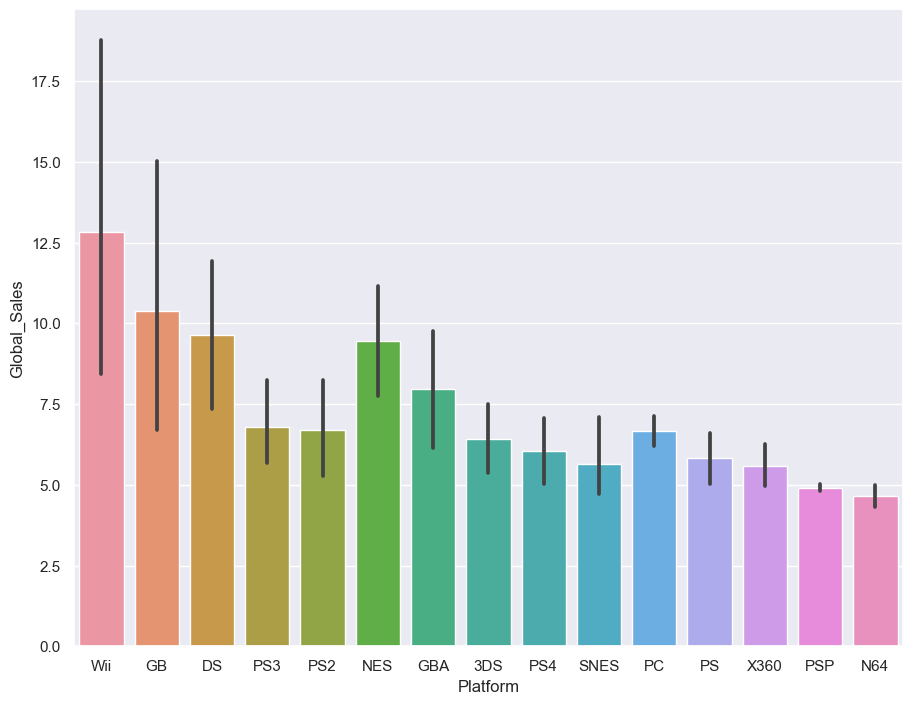

In [57]:
#Platform별
trend100 = 'Platform'
sns.barplot(df_highestGlobal, x=trend100, y='Global_Sales')

### 답 3-1. Platform 별 비교

1. Wii, NES, GB, DS(닌텐도 플랫폼)
- 닌텐도 플랫폼이 역대 1위부터 4위를 차지했습니다. 심지어 5위 걸로 6위에 GBA가 있는데 이 역시 닌텐도 플랫폼입니다. 

2. Wii, NES, GB의 평균 출고량이 오차 내에서 유의미하게 경합 중입니다.
- GB가 오차 고려할 시 가장 상위 97.5% 신뢰 지점이 높으며 오차 상위를 포함시 경합하는 플랫폼은 Wii, NES, DS, PS2, SNES, GBA 가 있습니다.

#### - 결론 -

- 닌텐도 플랫폼은 히트작의 산실입니다, 추후 나오는 닌텐도 플랫폼을 주목할 필요가 있습니다. 이외 PS2가 있는데 PS2 플랫폼 또한 어떤 특징으로 인기 있었는지 조사해볼 가치가 있습니다.

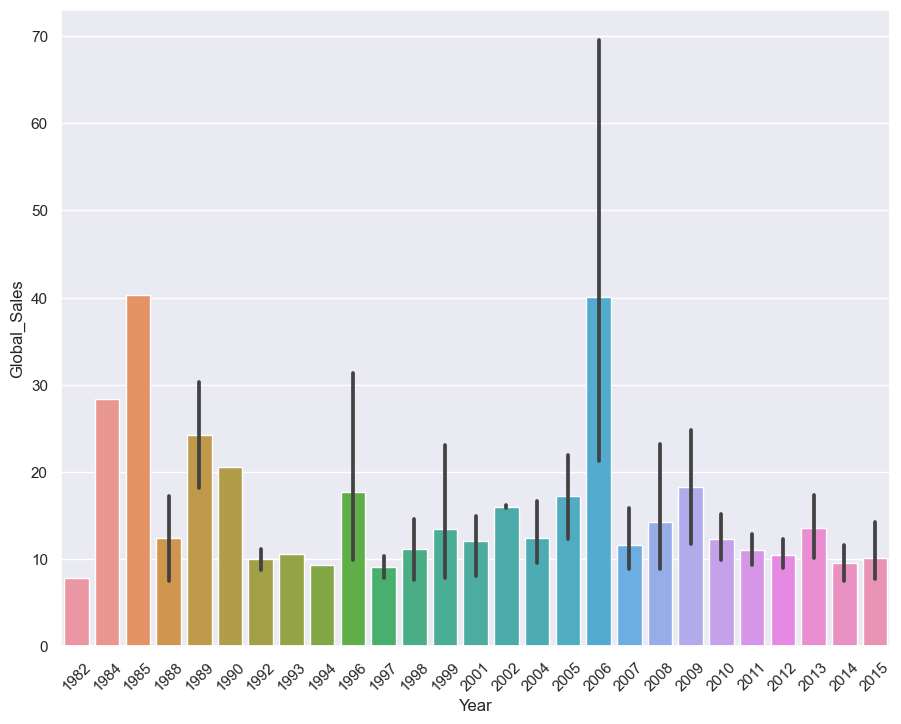

In [48]:
#Year별
trend100 = 'Year'
ax = sns.barplot(df_highestGlobal, x=trend100, y='Global_Sales')
plt.xticks(rotation=45);

### 답 3-2 년도별 비교
1. 평균 출고량 상위 2.5% 신뢰 지점 비교 2006년, 1985년, 1996년, 1989년, 1984년 순으로 많게 평가됩니다.
2. 1999년과 2009년, 2013년에는 급격한 상승 추세를 보입니다.

#### - 결론 - 
- 2006년, 1985년, 1996년, 1989년, 1984년, 그리고 1999년, 2009년, 2013년에는 어떤 사회적 현상이 있었고 어떤 분위기였고 어떤 사건이 있었는지 주목해볼 필요가 있으며, 출시일정을 맞춰서 고려해볼 필요가 있습니다.

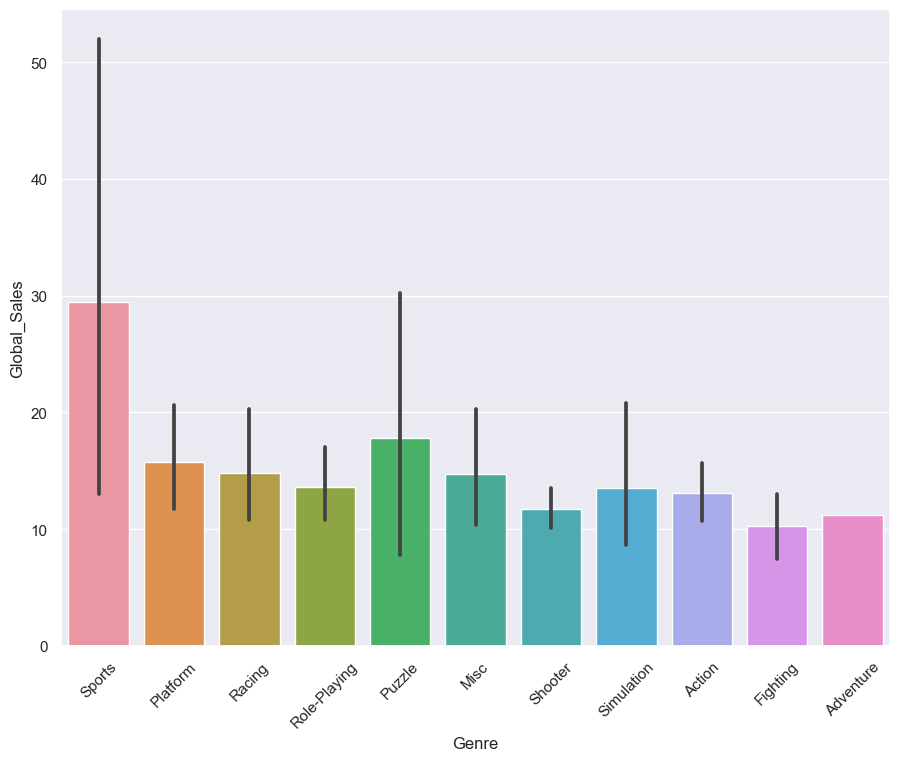

In [49]:
#Genre별
trend100 = 'Genre'
ax = sns.barplot(df_highestGlobal, x=trend100, y='Global_Sales')
plt.xticks(rotation=45);

### 답3-3. 장르별 비교
1. Sports와 Puzzle 장르의 출고량의 상위 2.5%지점이 두각을 나타냅니다.
2. Fighting과 Puzzle 장르의 출고량의 상위 97.5%지점이 가장 낮습니다.

#### - 결론 -
- Sports 게임은 가장 인기있는 장르이며, Puzzle도 못지 않지만 리스크가 있으며, Fighting 게임은 판매하지 않는 쪽이 좋습니다.

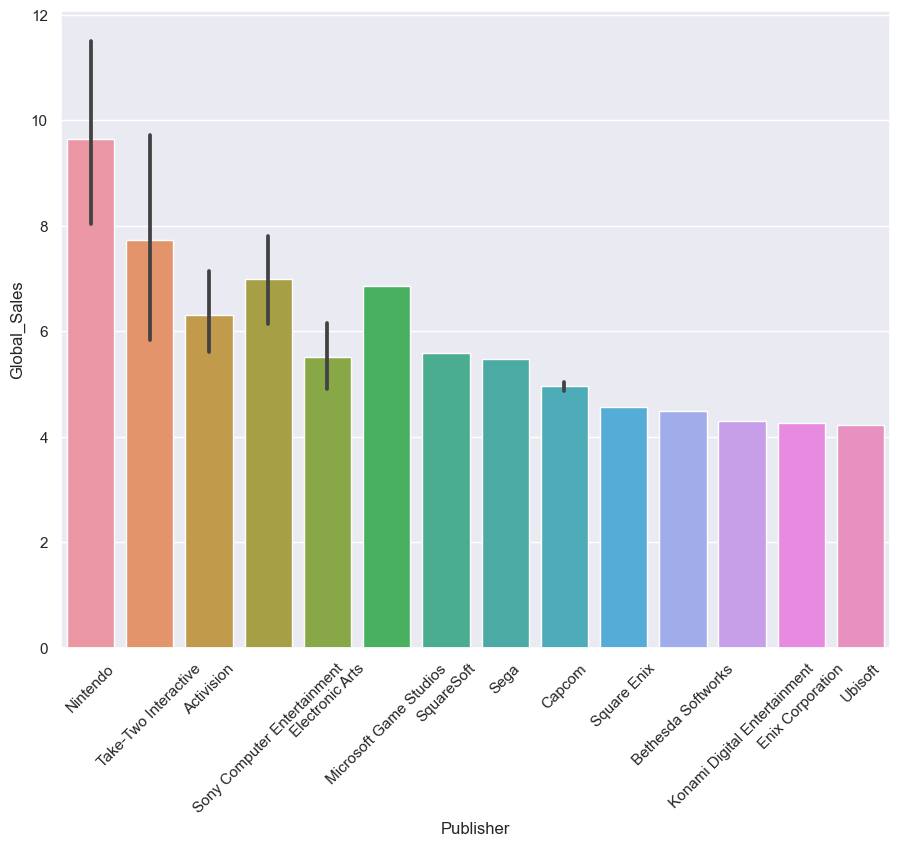

In [58]:
#Publisher별
trend100 = 'Publisher'
ax = sns.barplot(df_highestGlobal, x=trend100, y='Global_Sales')
plt.xticks(rotation=45);

### 답3-4. 퍼블리셔별 비교
1. Nintendo와 Take-Two Interactive, Sony Computer Entertainment 퍼블리셔의 출고량의 상위 2.5%지점이 각각 1, 2, 3위를 차지합니다.
2. Microsoft Game Studios와 Activision(각각 4, 5위) 퍼블리셔는 출고량이 Nintendo에 오차 범위 밖으로 적습니다.

#### - 결론 -
- Nintendo와 Take-Two Interactive, Sony Computer Entertainment 퍼블리셔를 통해서, 혹은 세 퍼블리셔의 스타일로 퍼블리싱을 할 때 최고의 출고량을 기대할 수 있습니다.

#### 3.1 최근의 전체 평균 출고량 분석은 어떻게 될까?

- 사실 게임 개발사는 기존에 존재하던 게임의 형식이나 디자인을 사용하는 경우가 있기 때문에 게임은 갈수록 발전할 것이며, 기존에 제작된 게임은 최근에 만들어진 게임에 전부 흡수가 되었다고 가정할시 <u>2010년 이후의 출고량 분석</u>이 유의미할 것입니다.

In [64]:
# Global_Sales 값을 구한 데이터프레임인 df_Global에서 Year가 2011이상인 것을 전부 추출한다.
df_GlobalRecent = df_Global[df_Global['Year'] >= 2011]
df_GlobalRecent

,Name,Platform,Year,Genre,Publisher,Global_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.01
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.03
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.03
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.01
...,...,...,...,...,...,...
16579,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0.03
16580,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.14
16587,MindJack,PS3,2011,Shooter,Square Enix,0.11
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.35


<AxesSubplot: xlabel='Platform', ylabel='Global_Sales'>

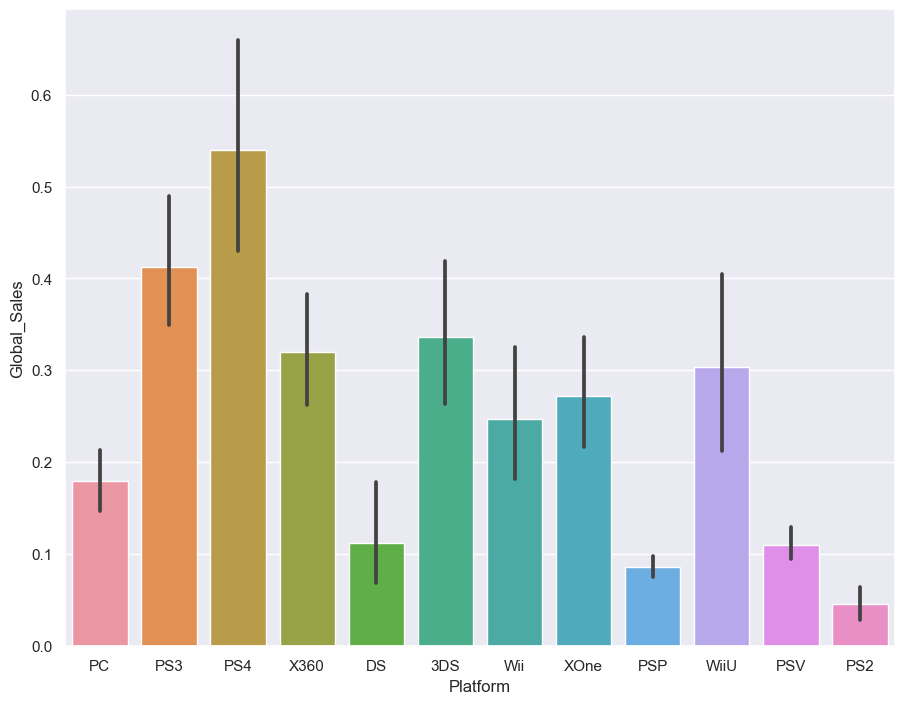

In [65]:
# 플랫폼에 따른 최근 트렌드
trendRecent = 'Platform'
sns.barplot(df_GlobalRecent, x= trendRecent, y='Global_Sales')

### 답3.1-1. 플랫폼별 비교
1. PS4와 PS3가 신뢰구간 상위 2.5% 기준 각각 1위와 2위입니다.
2. 3위인 3DS 이후로는 PS4에 비해 오차 범위 밖으로 출고량이 적습니다.

#### - 결론 -
- PS4나 PS3 플랫폼(혹은 차세대 PS시리즈인 PSV 플랫폼)으로 발매시 가장 높은 출고량을 기대할 수 있습니다.

<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

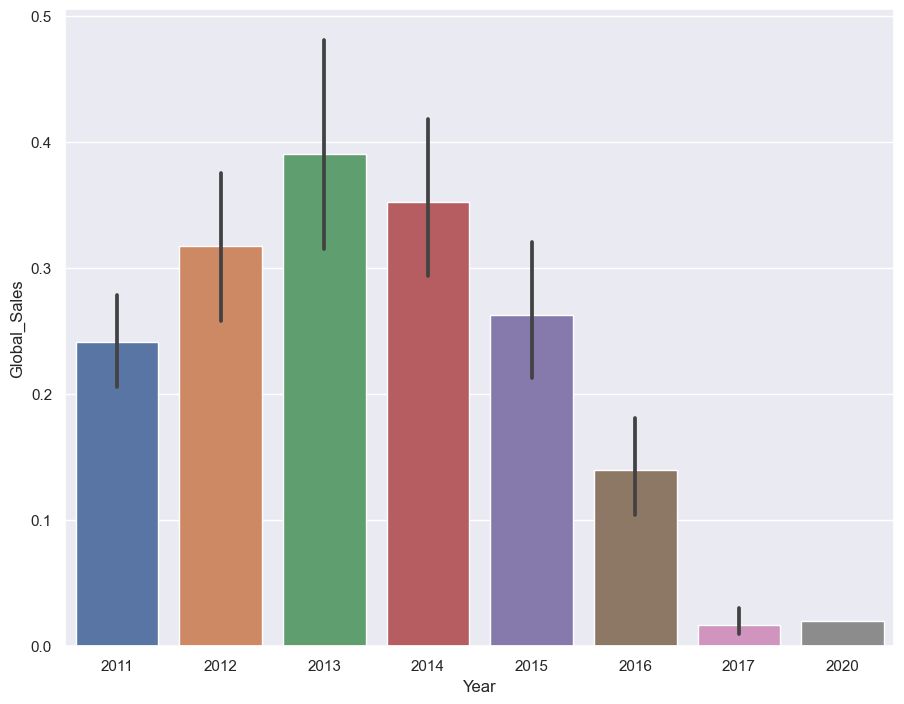

In [66]:
# 연도에 따른 최근 트렌드
trendRecent = 'Year'
sns.barplot(df_GlobalRecent, x= trendRecent, y='Global_Sales')

### 답 3.1-2 년도별 비교
1. 평균 출고량 상위 2.5% 신뢰 지점 비교 2013년, 2014년, 2012년, 2015년 순으로 많게 평가됩니다.
2. 2011년의 출고량은 2013년에 비해 오차밖으로 적습니다.

#### - 결론 - 
- 2013년, 2014년, 2012년, 2015년에는 어떤 사회적 현상이 있었고 어떤 분위기였고 어떤 사건이 있었는지 주목해볼 필요가 있으며, 출시일정을 맞춰서 고려해볼 필요가 있습니다.

<AxesSubplot: xlabel='Genre', ylabel='Global_Sales'>

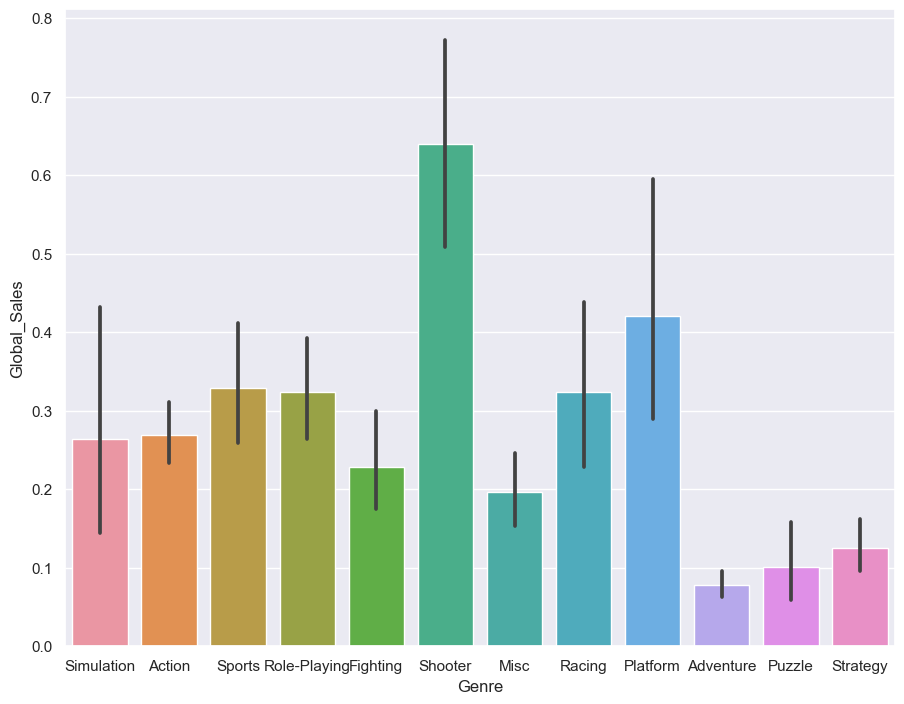

In [67]:
# 장르에 따른 최근 트렌드
trendRecent = 'Genre'
sns.barplot(df_GlobalRecent, x= trendRecent, y='Global_Sales')

### 답3.1-3. 장르별 비교
1. Shooter와 Platform 장르의 출고량의 상위 2.5%지점이 각각 1, 2위를 차지합니다.
2. 3위인 Racing 장르부터는 출고량이 Shooter 장르의 출고량의 오차 범위 밖으로 적습니다.
3. Adventure와 Puzzle 장르는 출고량을 상위 97.5%지점이 각각 밑에서 2위, 1위를 차지합니다.

#### - 결론 -
- Shooter와 Platform 게임은 가장 평균적으로 인기있는 장르이며, Adventure와 Puzzle 게임은 판매하지 않는 쪽이 좋습니다.

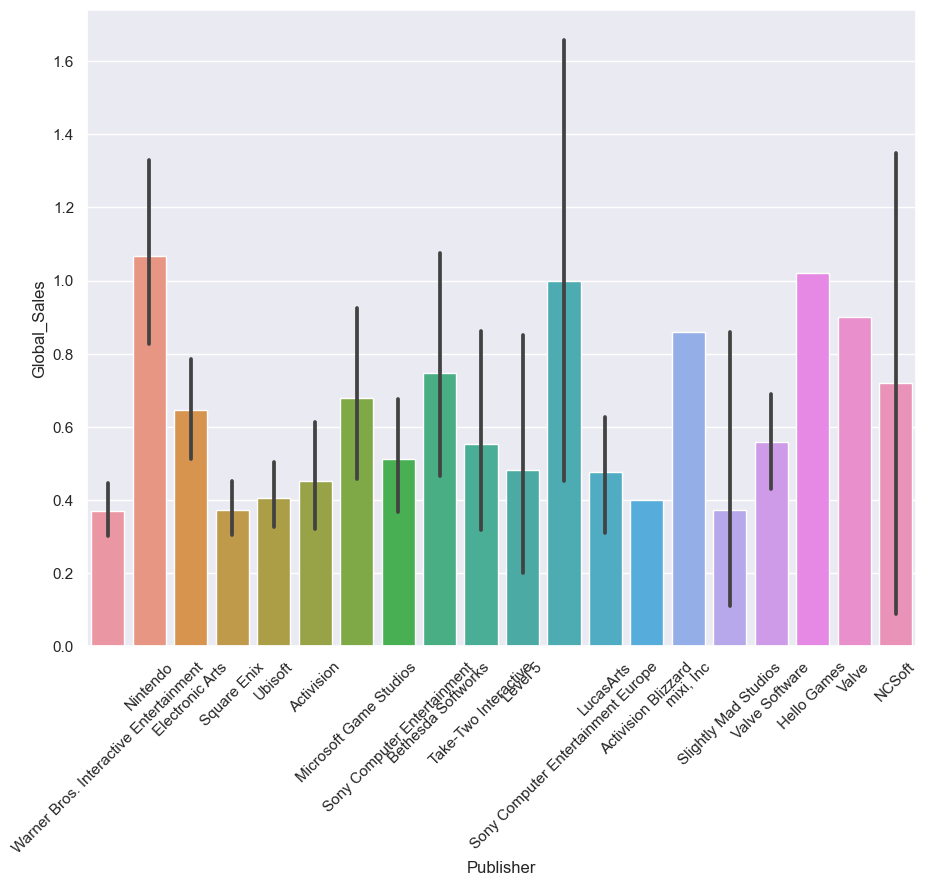

In [81]:
# 퍼블리셔에 따른 최근 트렌드(퍼블리셔 수는 너무 많으므로 상위 20 퍼블리셔만 추립니다.)
GlobalRecent20Index = df_GlobalRecent.groupby('Publisher')['Global_Sales'].mean().nlargest(20).index
df_GlobalRecent20 = df_GlobalRecent[df_GlobalRecent['Publisher'].isin(GlobalRecent20Index)]

# 그래프를 작성합니다.
trendRecent = 'Publisher'
sns.barplot(df_GlobalRecent20, x= trendRecent, y='Global_Sales')
plt.xticks(rotation=45);
# df_GlobalRecent20[df_GlobalRecent20['Publisher'] == 'Level 5']

### 답3.1-4. 퍼블리셔별 비교
1. Level5, NCSoft와 Nintendo 퍼블리셔의 출고량의 상위 2.5%지점이 각각 1, 2, 3위를 차지합니다.
2. Nintendo, Valve Software, Level 5 퍼블리셔의 출고량의 평균 지점이 각각 1, 2, 3위를 차지합니다.
3. mixi, Inc와 NCSoft의 출고량의 상위 97.5% 지점은 각각 2위, 1위입니다.

#### - 결론 -
- Level5, NCSoft와 Nintendo, Valve Software 퍼블리셔를 통해서, 혹은 네 퍼블리셔의 스타일로 퍼블리싱을 할 때 최고의 출고량을 기대할 수 있으나 NCSoft의 경우 리스크가 굉장히 큽니다.

### 총 결론
1. 일본 지역 취향의 게임은 유럽 지역이나 기타 지역 취향과 맞지 않는 관계로 만일 세계가 아닌 각 지역을 공략하고자 한다면, 지역 취향의 게임(예컨데 일본 지역의 롤플레잉이나, EU나 Other의 shooter게임)을 출고토록해야 합니다. 북미 지역의 취향에 맞출 경우 타 지역과의 취향차가 최소화될 것으로 예상됩니다.

2. SONY의 최신 PS 플랫폼에서 롤플레잉 게임을 닌텐도 스타일로 퍼블리싱하는 게 게임사들이 퍼블리싱하는 가운데 가장 인기일 것입니다.

3. 최신 닌텐도 플랫폼에, 2006년에 가까운 출시 상황에 맞춰, Sports 게임을 출시하며, Nintendo를 통해 퍼블리싱을 함으로 최고의 출고량을 노릴 수 있을 것입니다.

-  3.1.  2010년 이후의 최근 데이터만 전체 반영시, PS4나 혹은 PS5 플랫폼으로, 2013년도에 가까운 출시 상황에 맞춰, Shooter 게임을 Level 5를 통해 퍼블리싱하는 경우, 가장 기대 출고량이 높습니다.
